[IPython Notebook](ORB.ipynb) |  [Python Script](ORB.py)

'orb' Datasets and Options
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's create the and orb dataset and attach it to the Bundle

In [3]:
b.add_dataset('orb')
print b.filter(kind='orb')

ParameterSet: 2 parameters
     times@primary@orb01@dataset: [] d
   times@secondary@orb01@dataset: [] d


### times

In [4]:
print b['times']

ParameterSet: 2 parameters
     times@primary@orb01@dataset: [] d
   times@secondary@orb01@dataset: [] d


Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to dynamics and the ORB dataset

In [5]:
print b['compute']

ParameterSet: 15 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: wilson
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
  enabled@orb01@phoebe01@compute: True


### dynamics_method

In [6]:
print b['dynamics_method']

Parameter: dynamics_method@phoebe01@compute
                       Qualifier: dynamics_method
                     Description: Which method to use to determine the dynamics of components
                           Value: keplerian
                         Choices: keplerian



The 'dynamics_method' parameter controls how stars and components are placed in the coordinate system as a function of time and has several choices:
 * keplerian (default): Use Kepler's laws to determine positions.  If the system has more than two components, then each orbit is treated independently and nested (ie there are no dynamical/tidal effects - the inner orbit is treated as a single point mass in the outer orbit).
 * nbody: Use an n-body integrator to determine positions.  Here the initial conditions (positions and velocities) are still defined by the orbit's Keplerian parameters at 't0@system'.  Closed orbits and orbital stability are not guaranteed and ejections can occur.

### ltte

In [7]:
print b['ltte']

Parameter: ltte@phoebe01@compute
                       Qualifier: ltte
                     Description: Correct for light travel time effects
                           Value: False



The 'ltte' parameter sets whether light travel time effects (Roemer delay) are included.  If set to False, the positions and velocities are returned as they actually are for that given object at that given time.  If set to True, they are instead returned as they were or will be when their light reaches the origin of the coordinate system.

See the [Systemic Velocity Example Script](../examples/vgamma) for an example of how 'ltte' and 'vgamma' (systemic velocity) interplay.

Synthetics
------------------

In [8]:
b.set_value_all('times', np.linspace(0,3,201))

In [9]:
b.run_compute()

<ParameterSet: 14 parameters | components: primary, secondary>

In [10]:
b['orb@model'].twigs

['times@primary@orb01@phoebe01@latest@orb@model',
 'us@primary@orb01@phoebe01@latest@orb@model',
 'vs@primary@orb01@phoebe01@latest@orb@model',
 'ws@primary@orb01@phoebe01@latest@orb@model',
 'vus@primary@orb01@phoebe01@latest@orb@model',
 'vvs@primary@orb01@phoebe01@latest@orb@model',
 'vws@primary@orb01@phoebe01@latest@orb@model',
 'times@secondary@orb01@phoebe01@latest@orb@model',
 'us@secondary@orb01@phoebe01@latest@orb@model',
 'vs@secondary@orb01@phoebe01@latest@orb@model',
 'ws@secondary@orb01@phoebe01@latest@orb@model',
 'vus@secondary@orb01@phoebe01@latest@orb@model',
 'vvs@secondary@orb01@phoebe01@latest@orb@model',
 'vws@secondary@orb01@phoebe01@latest@orb@model']

In [11]:
print b['times@primary@orb01@orb@model']

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Synthetic times
                           Value: [0.    0.015 0.03  ... 2.97  2.985 3.   ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [12]:
print b['us@primary@orb01@orb@model']

Parameter: us@primary@latest@model
                       Qualifier: us
                     Description: U position
                           Value: [ 1.62265701e-16 -2.49387030e-01 -4.96560484e-01 ...
  4.96560484e-01  2.49387030e-01 -2.19140711e-15] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [13]:
print b['vus@primary@orb01@orb@model']

Parameter: vus@primary@latest@model
                       Qualifier: vus
                     Description: U velocity
                           Value: [-134.07073898 -133.4757283  -131.6959776  ... -131.6959776
 -133.4757283  -134.07073898] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, orb datasets plot as 'vs' vx 'us' (plane of sky coordinates).  Notice the y-scale here with inclination set to 90.

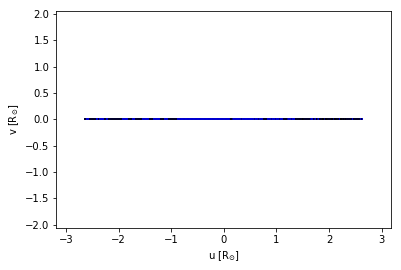

In [14]:
afig, mplfig = b['orb@model'].plot(show=True)

As always, you have access to any of the arrays for either axes, so if you want to plot 'vus' vs 'times'

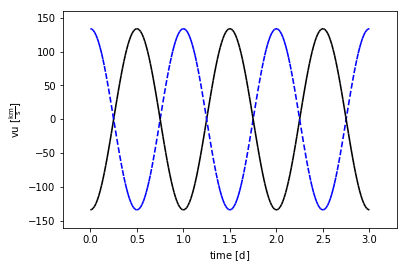

In [15]:
afig, mplfig = b['orb@model'].plot(x='times', y='vus', show=True)

We can also plot the orbit in 3D.

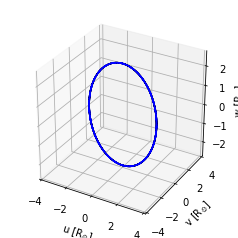

In [16]:
afig, mplfig = b['orb@model'].plot(projection='3d', xlim=(-4,4), ylim=(-4,4), zlim=(-4,4), show=True)